In [0]:
import numpy as np
import matplotlib.pyplot as plt

import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Creating input data

In [0]:
pointsAmount = 50
rangeStart = -2
rangeEnd = 2
random_state = 42

In [0]:
def dataFunc(x):
  return 1/(1+25*x**2)

In [0]:
def get_xy(pointsAmount, rangeStart, rangeEnd):
  X = np.linspace(rangeStart, rangeEnd, num=pointsAmount, endpoint=True)
  Y = dataFunc(X)
  return np.array(X), np.array(Y)

In [0]:
X_input, Y_input = get_xy(pointsAmount, rangeStart, rangeEnd)

X_train, X_test, y_train, y_test = train_test_split(X_input, Y_input, test_size=0.33, random_state=random_state)

X_train = X_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]

X_test = X_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

## Input data display

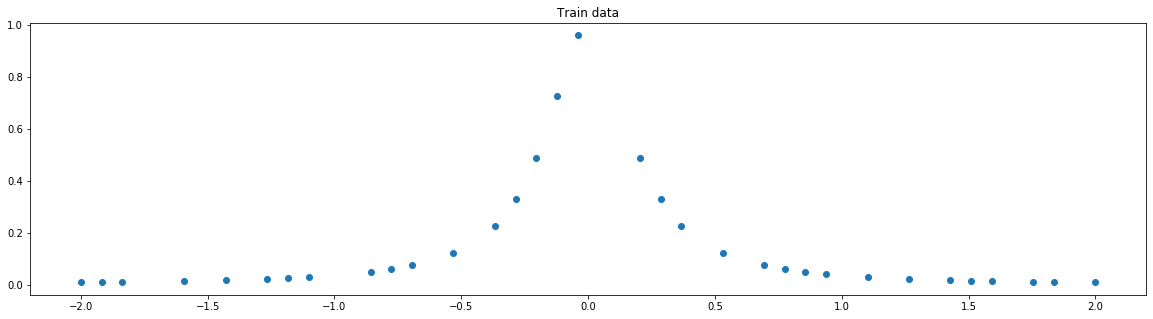

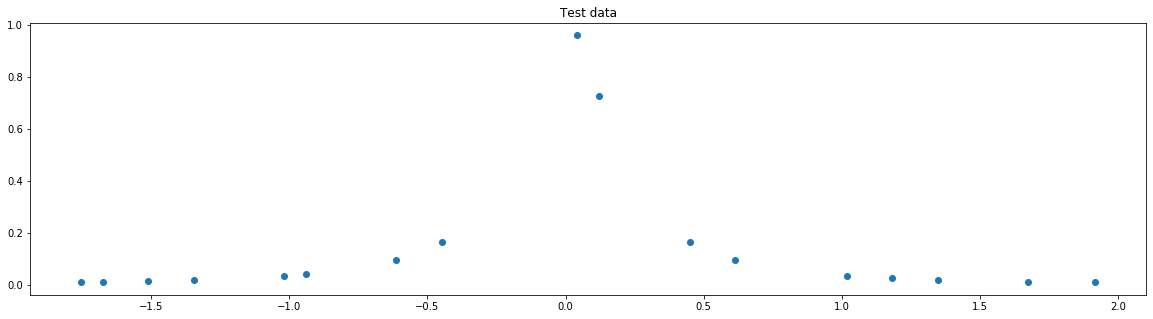

In [0]:
plt.figure(figsize=(20,5))
plt.plot(X_train, y_train, 'o')
plt.title('Train data')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(X_test,y_test, "o")
plt.title('Test data')
plt.show()

##Polynomial regression

-----------Polynomial regression degree = 1
mse: 0.06916508310242087


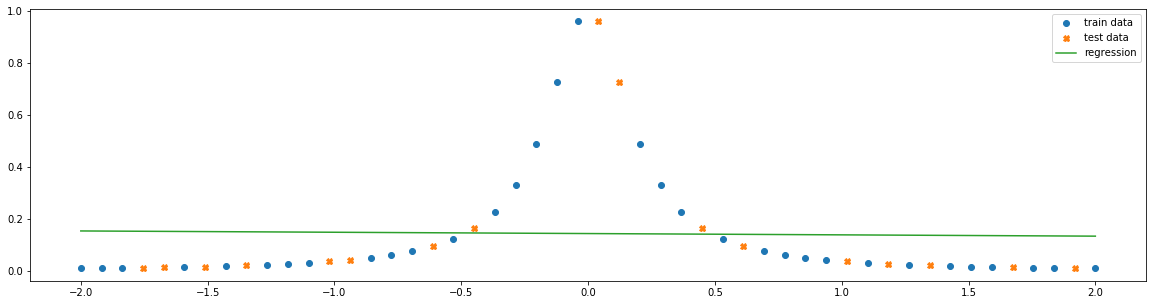

-----------Polynomial regression degree = 2
mse: 0.048619310511440965


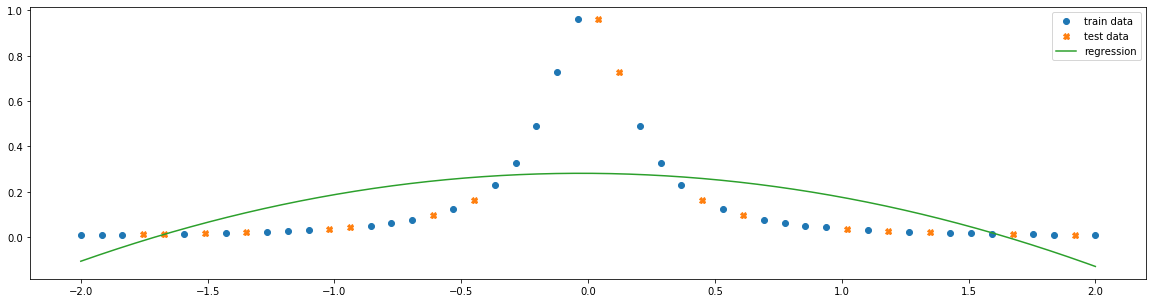

-----------Polynomial regression degree = 3
mse: 0.048685768999033784


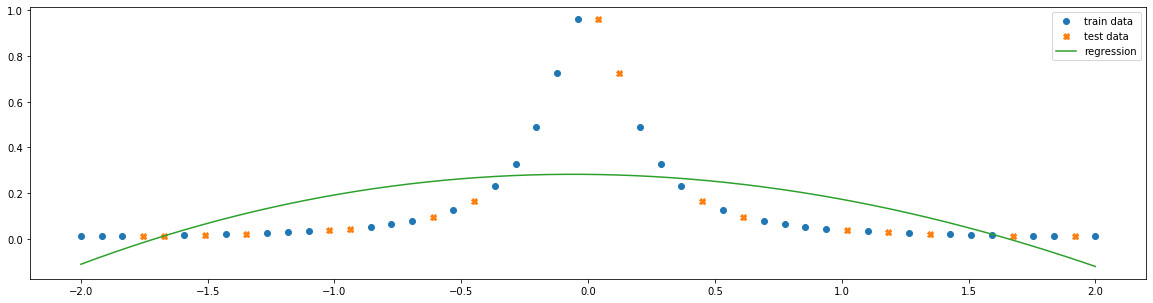

-----------Polynomial regression degree = 4
mse: 0.034496318694945745


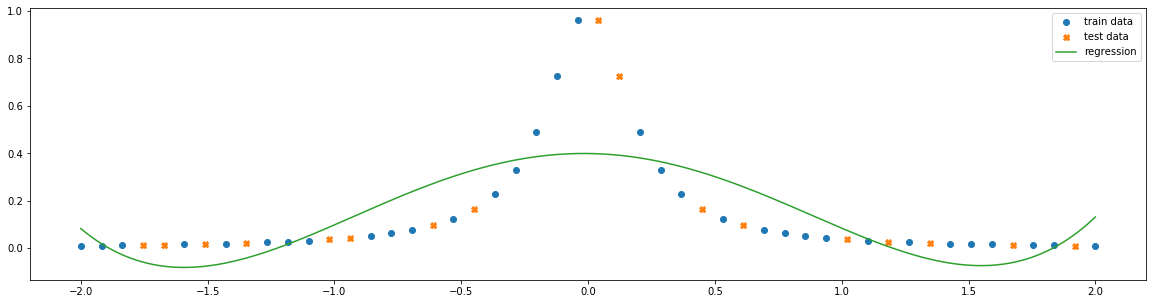

-----------Polynomial regression degree = 5
mse: 0.035380882620171736


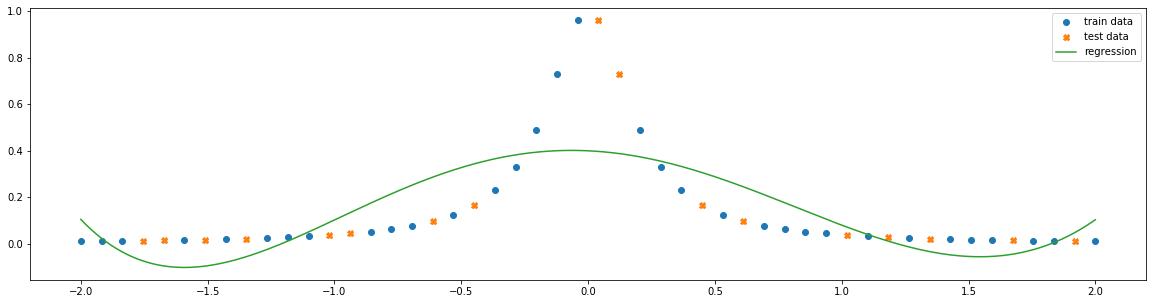

-----------Polynomial regression degree = 6
mse: 0.023972434336927653


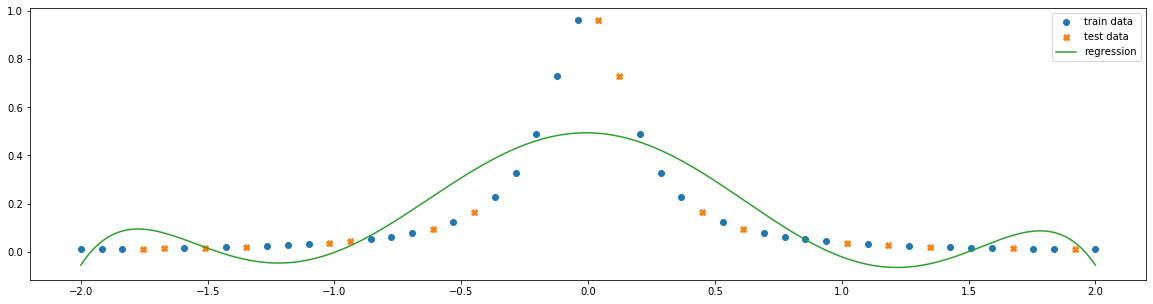

-----------Polynomial regression degree = 7
mse: 0.024228443881556636


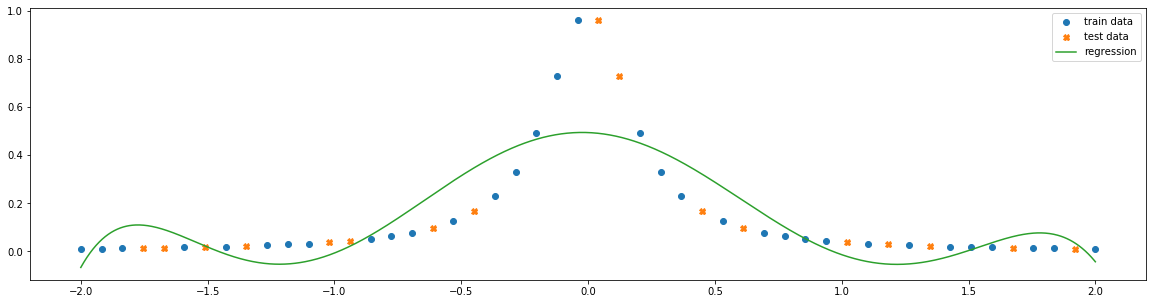

-----------Polynomial regression degree = 8
mse: 0.015971058091833766


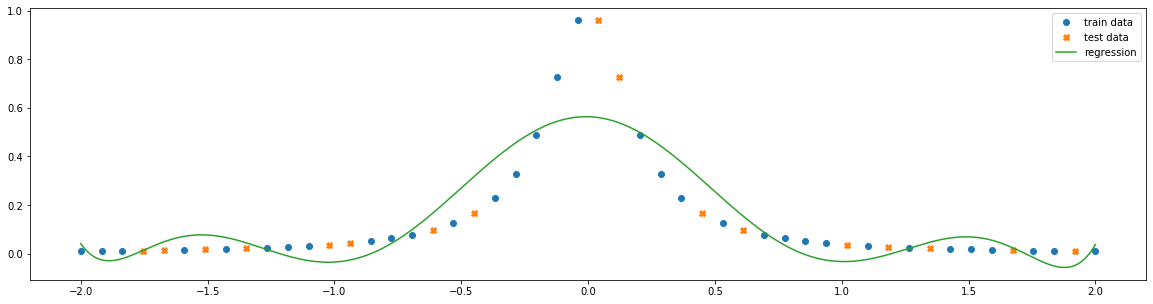

-----------Polynomial regression degree = 9
mse: 0.016365550346751707


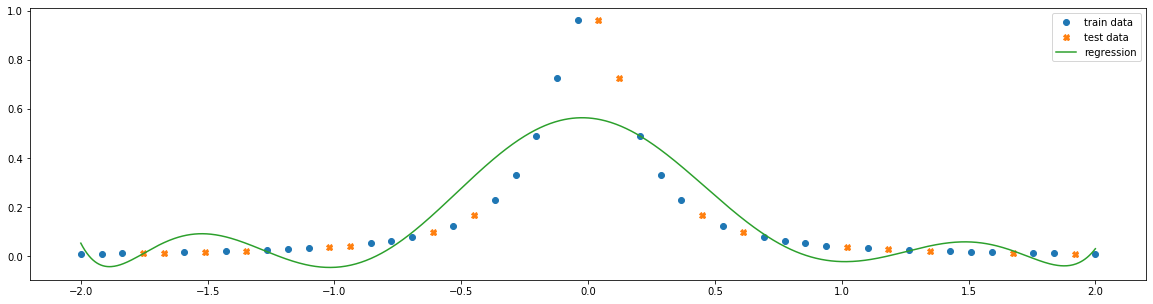

-----------Polynomial regression degree = 10
mse: 0.01087682816388478


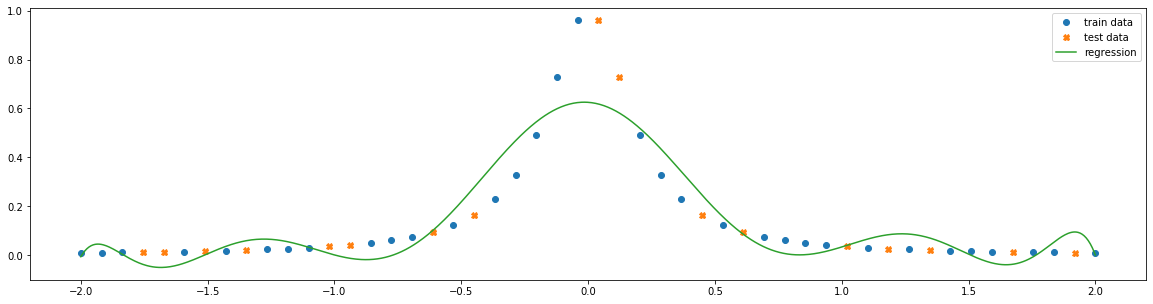

-----------Polynomial regression degree = 11
mse: 0.01092521735748613


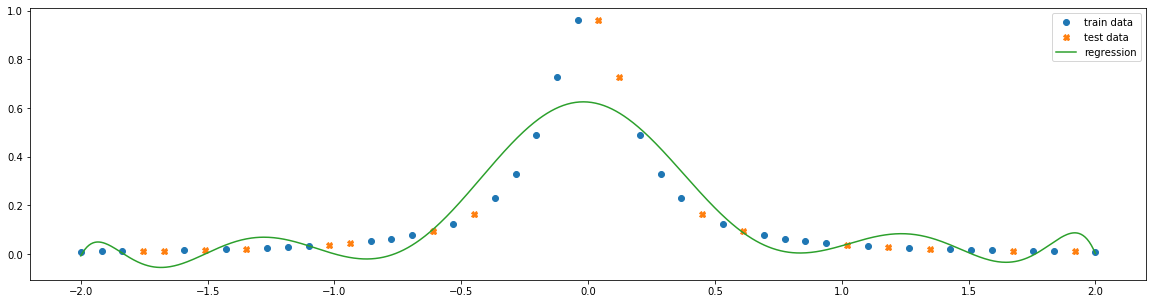

-----------Polynomial regression degree = 12
mse: 0.008405877174994495


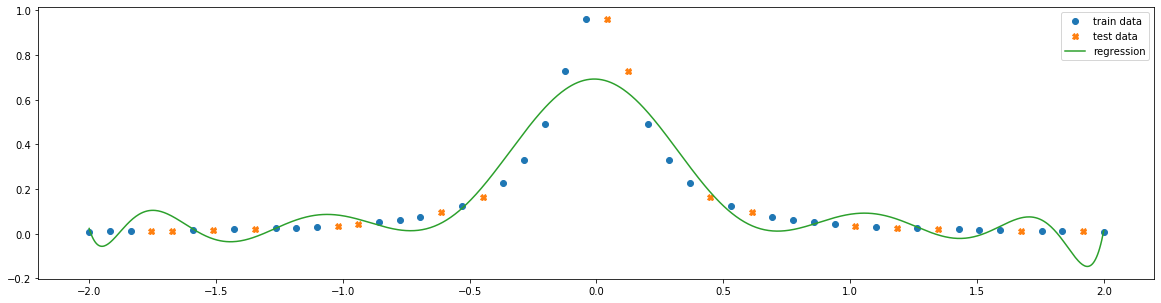

-----------Polynomial regression degree = 13
mse: 0.0084006351871566


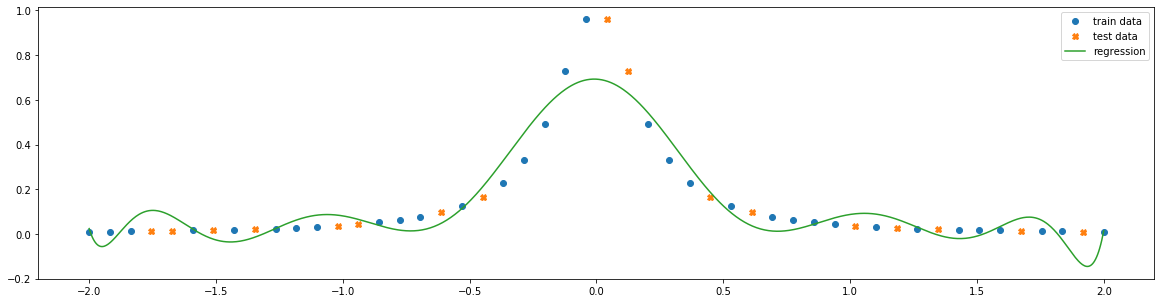

-----------Polynomial regression degree = 14
mse: 0.006329658513848901


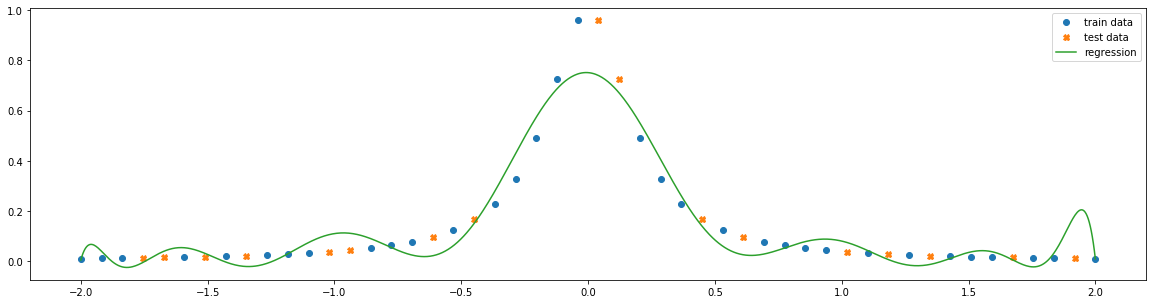

-----------Polynomial regression degree = 15
mse: 0.006416565890563403


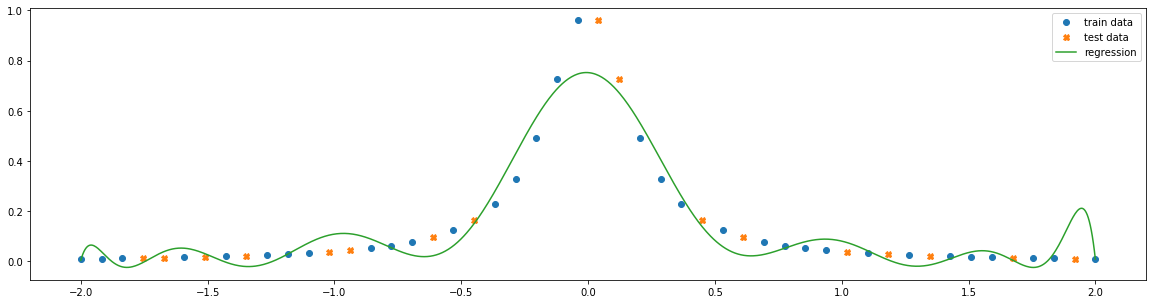

-----------Polynomial regression degree = 16
mse: 0.005974774233984316


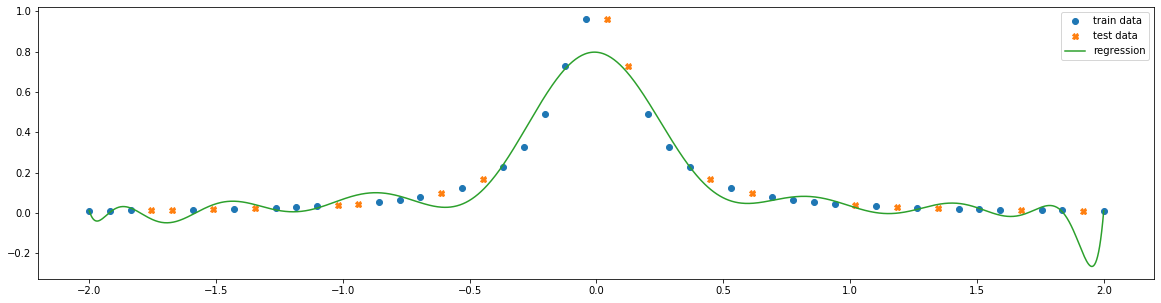

-----------Polynomial regression degree = 17
mse: 0.007204487294712547


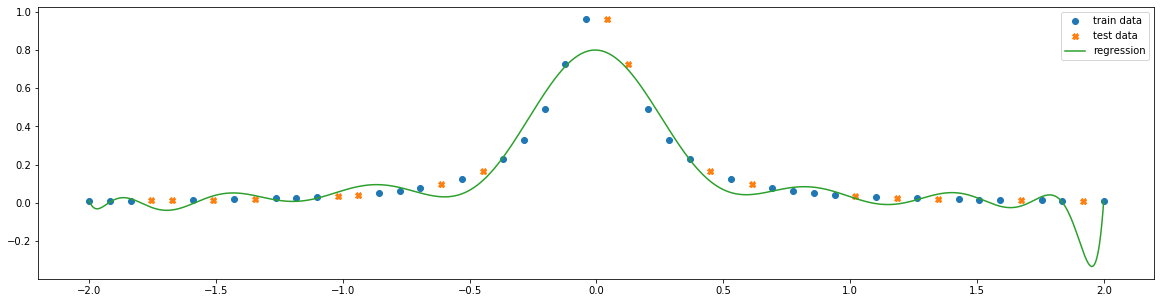

-----------Polynomial regression degree = 18
mse: 0.016500069631650825


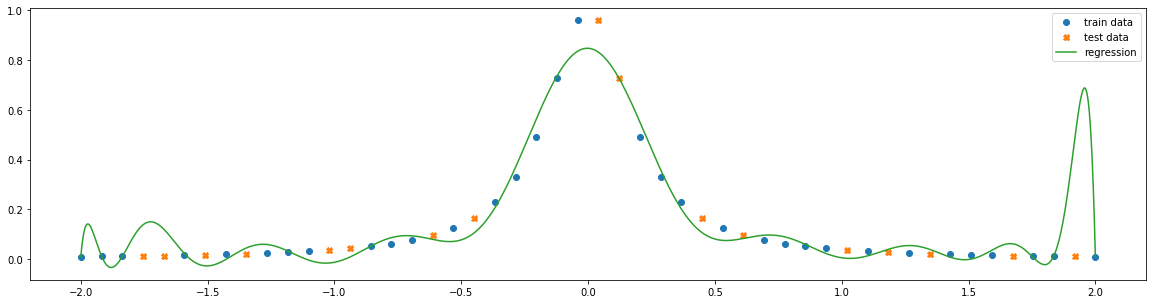

-----------Polynomial regression degree = 19
mse: 0.015021806977314485


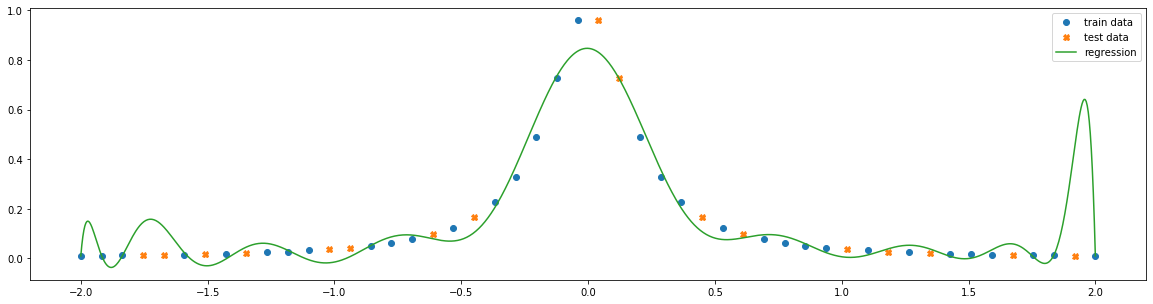

-----------Polynomial regression degree = 20
mse: 0.10374917136560557


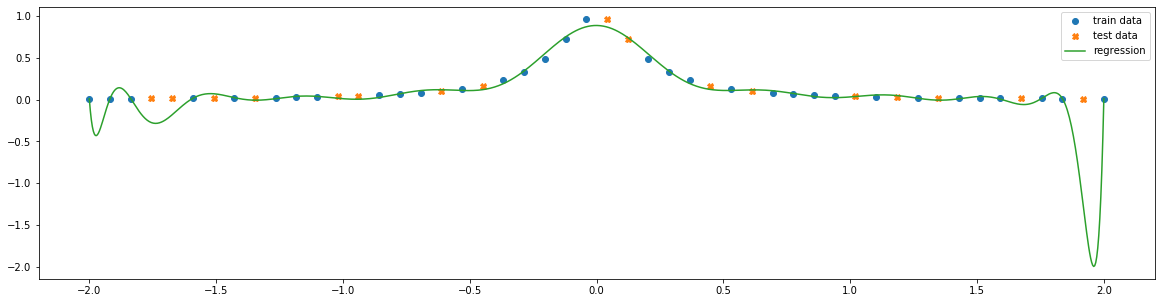

-----------Polynomial regression degree = 21
mse: 0.05588124211046764


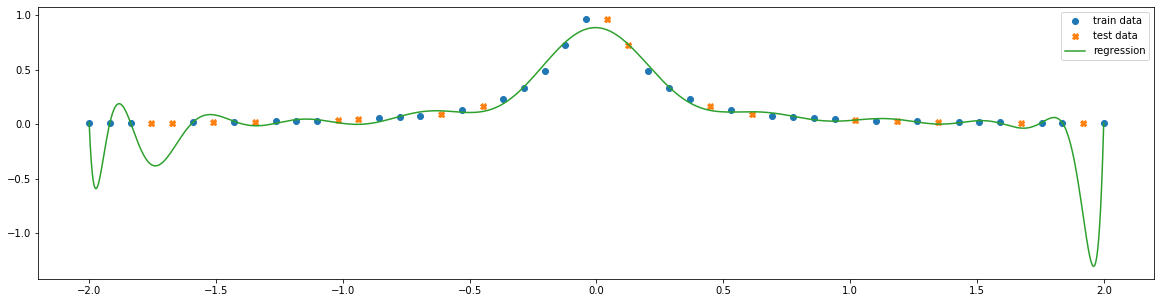

-----------Polynomial regression degree = 22
mse: 1.286866034991805


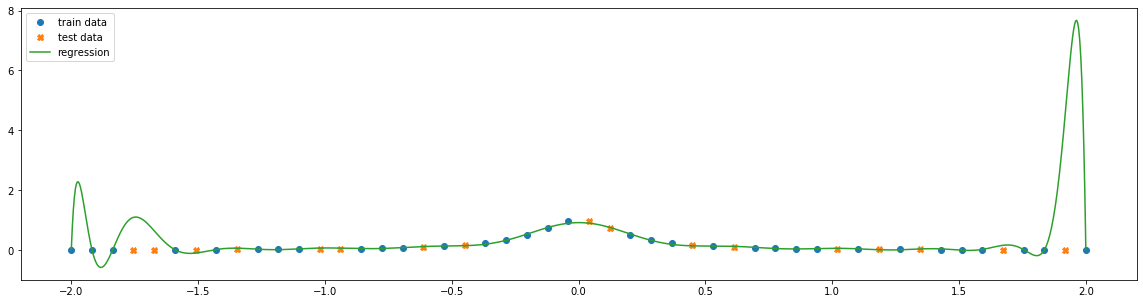

-----------Polynomial regression degree = 23
mse: 0.4218110174371939


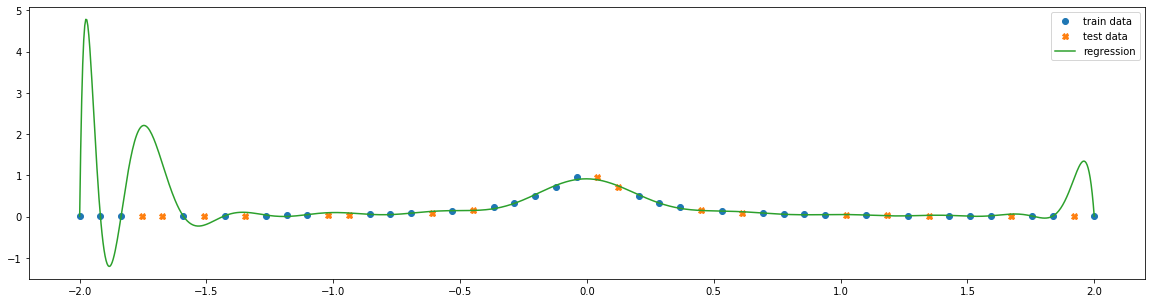

-----------Polynomial regression degree = 24
mse: 6.595555115396815


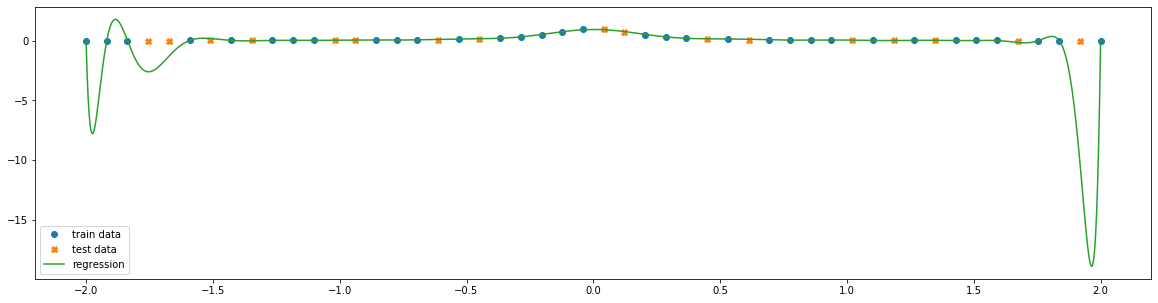

-----------Polynomial regression degree = 25
mse: 3.7885195345903573


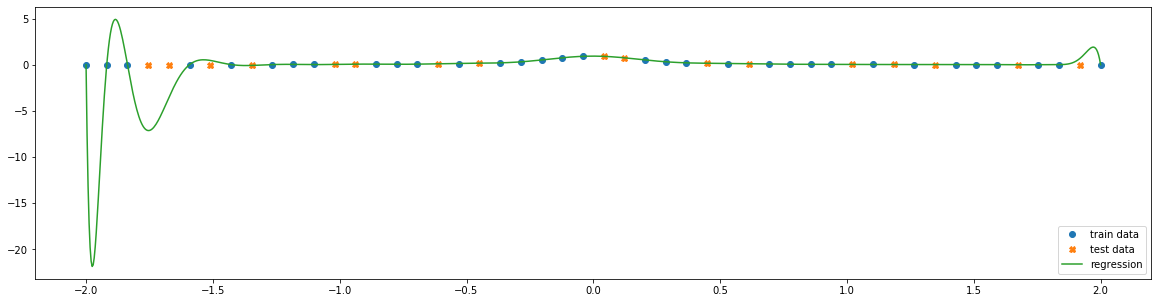

-----------Polynomial regression degree = 26
mse: 438.07263286405816


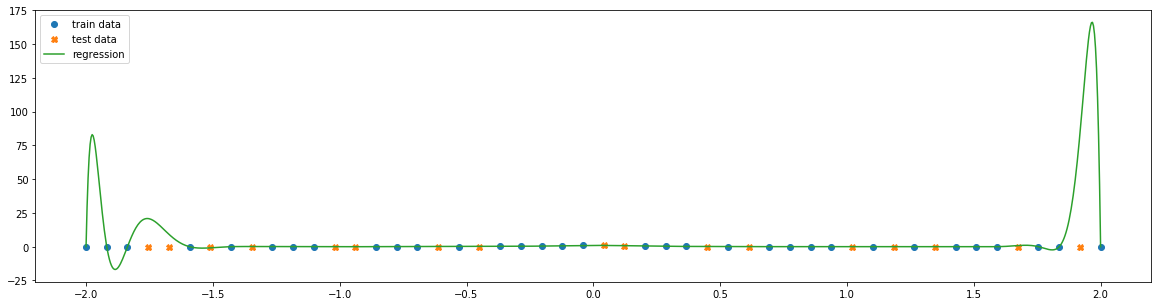

-----------Polynomial regression degree = 27
mse: 452.0395605084134


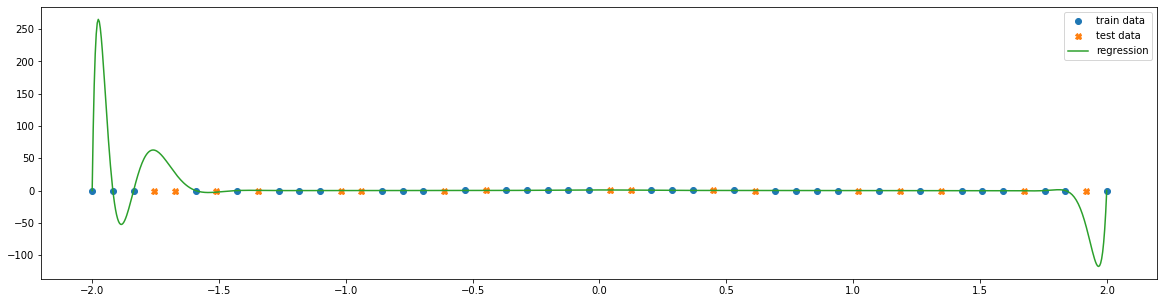

-----------Polynomial regression degree = 28
mse: 28099.511353847796


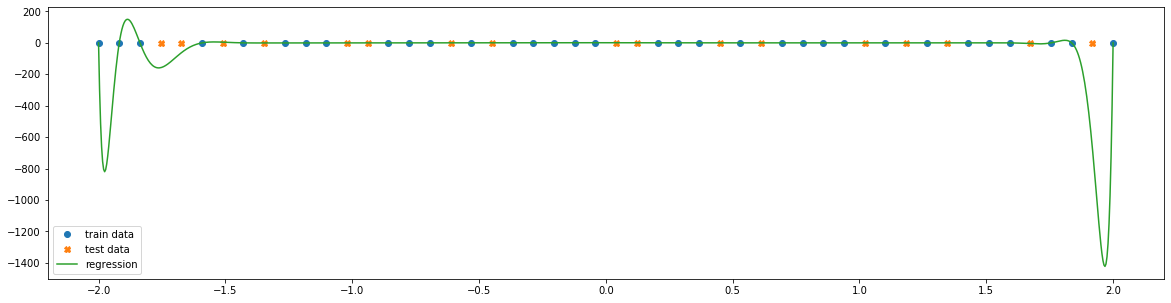

-----------Polynomial regression degree = 29
mse: 7260.656473992512


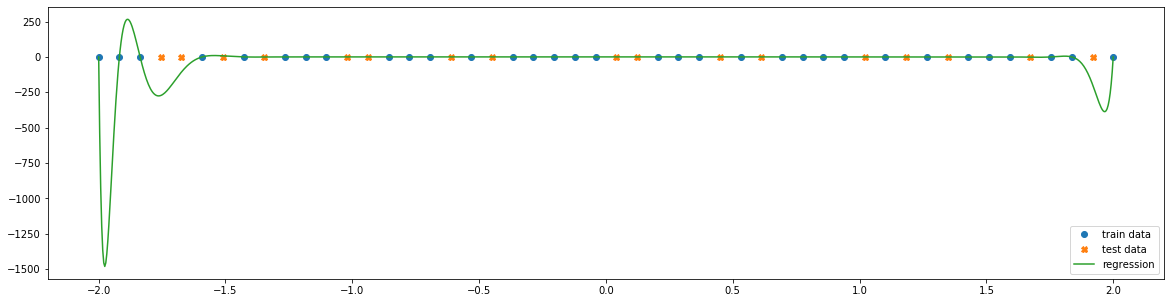

-----------Polynomial regression degree = 30
mse: 149837.4540610053


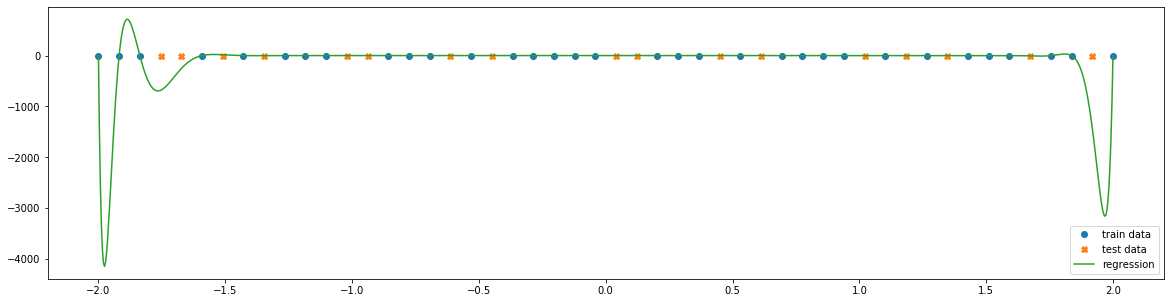

-----------Polynomial regression degree = 31
mse: 204485.7824135896


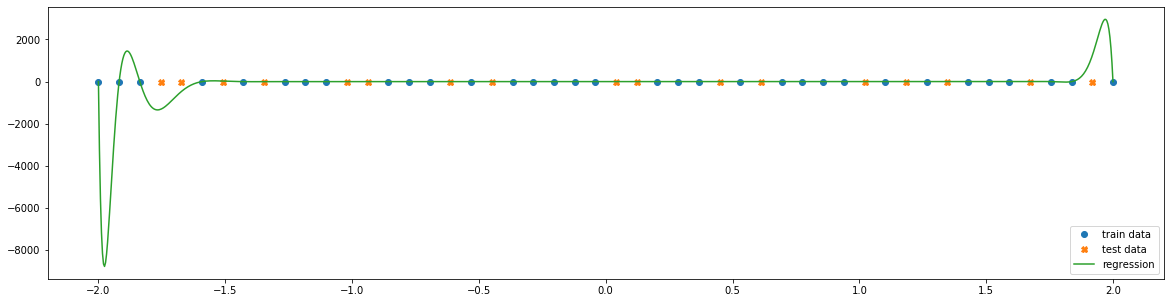

-----------Polynomial regression degree = 32
mse: 6958710.156969691


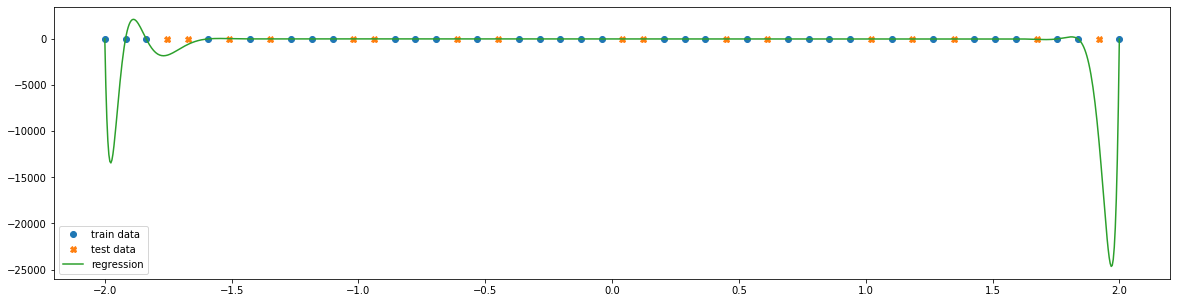

In [0]:
for i in np.arange(1,len(X_train)):
      print("-----------Polynomial regression degree =",i)
      polynomial_features= PolynomialFeatures(degree=i)
      x_poly = polynomial_features.fit_transform(X_train)

      model = LinearRegression()
      model.fit(x_poly, y_train)

      # mean_squared_error
      y_pred = model.predict(polynomial_features.fit_transform(X_test))
      mse = mean_squared_error(y_test, y_pred);
      print("mse:", mse);
      
      # predicted function
      xNew = np.linspace(-2, 2, num=1000, endpoint=True)
      xnew = xNew[:, np.newaxis]
      xnew = polynomial_features.fit_transform(xnew)
      ypred = model.predict(xnew)

      plt.figure(figsize=(20,5))
      plt.plot(X_train, y_train, 'o', X_test, y_test, 'X', xNew, ypred, '-')
      plt.legend(['train data', 'test data','regression'], loc='best')
      plt.show()


## Lagrange polynomial

mse: 2299801873.557224


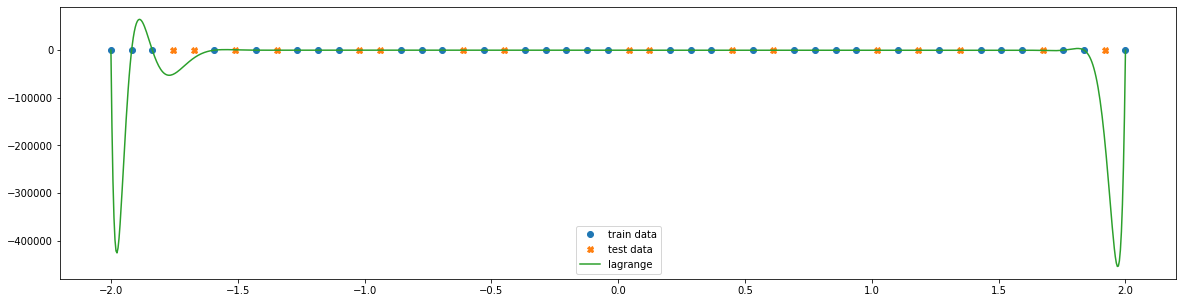

In [0]:
from scipy.interpolate import lagrange

poly = lagrange(np.concatenate(X_train), np.concatenate(y_train))

# mean_squared_error
mse = mean_squared_error(y_test, poly(X_test));
print("mse:", mse);


xnew = np.linspace(-2, 2, num=1000, endpoint=True)
plt.figure(figsize=(20,5))
plt.plot(X_train, y_train, 'o', X_test, y_test, 'X', xnew, poly(xnew), '-')
plt.legend(['train data', 'test data', 'lagrange'], loc='best')
plt.show()

## Spline interpolation

mse: 0.00184450030398077


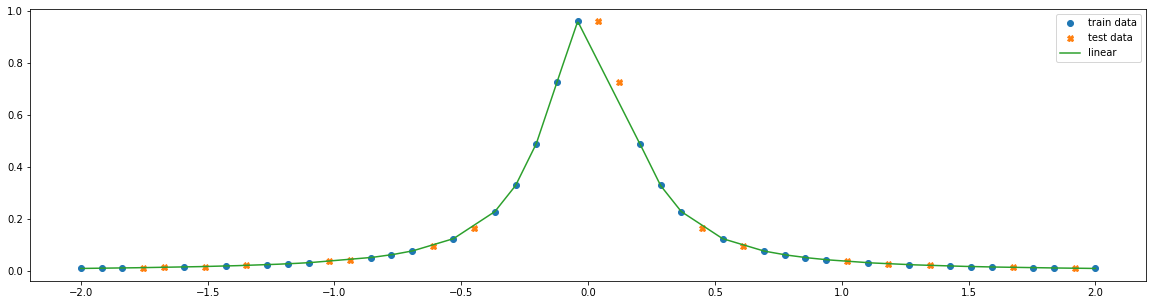

mse: 1.5665400450401436e-05


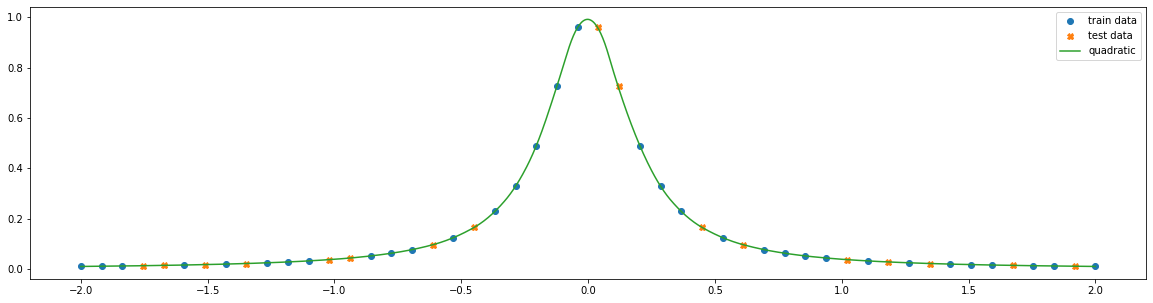

mse: 2.2447494512788537e-05


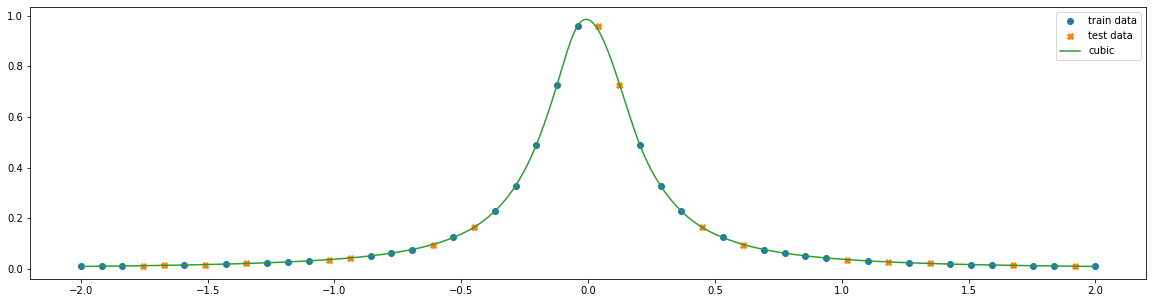

In [0]:
from scipy.interpolate import interp1d

x = np.concatenate(X_train)
y = np.concatenate(y_train)

f = interp1d(x, y, bounds_error=False)
f1 = interp1d(x, y, kind='quadratic', bounds_error=False)
f2 = interp1d(x, y, kind='cubic', bounds_error=False)

# mean_squared_error
mse = mean_squared_error(y_test, f(X_test));
print("mse:", mse);

xnew = np.linspace(-2, 2, num=1000, endpoint=True)
plt.figure(figsize=(20,5))
plt.plot(x, y, 'o', X_test, y_test, 'X', xnew, f(xnew), '-')
plt.legend(['train data', 'test data', 'linear'], loc='best')
plt.show()

# mean_squared_error
mse = mean_squared_error(y_test, f1(X_test));
print("mse:", mse);

plt.figure(figsize=(20,5))
plt.plot(x, y, 'o', X_test, y_test, 'X', xnew, f1(xnew), '-')
plt.legend(['train data', 'test data', 'quadratic'], loc='best')
plt.show()

# mean_squared_error
mse = mean_squared_error(y_test, f2(X_test));
print("mse:", mse);

plt.figure(figsize=(20,5))
plt.plot(x, y, 'o', X_test, y_test, 'X', xnew, f2(xnew), '-')
plt.legend(['train data', 'test data', 'cubic'], loc='best')
plt.show()